 # Projeto - Previsão de sucesso de campanhas de marketing

[https://www.kaggle.com/loveall/clicks-conversion-tracking](https://www.kaggle.com/loveall/clicks-conversion-tracking)

# Descrição do problema

A empresa XYZ é uma grande empresa de streaming de vídeo e está enfrentando um alto índice de cancelamento de assinaturas. Eles coletaram dados dos usuários, incluindo informações sobre o uso do serviço, a taxa de assinatura e a satisfação do cliente. Neste problema, você pode usar um conjunto de dados do Kaggle que contém informações sobre anúncios on-line de uma empresa. O conjunto de dados contém informações sobre o anúncio, o site em que o anúncio foi exibido, o horário em que o anúncio foi exibido e a ação do usuário em relação ao anúncio (clique ou conversão). Você pode treinar um modelo de classificação usando esses recursos para prever se um usuário irá clicar ou converter em um anúncio e avaliar o desempenho do modelo usando métricas como precisão, recall e F1-score. A empresa pode usar esse modelo para segmentar seus usuários de acordo com a probabilidade de clicar ou converter em um anúncio e direcionar seus recursos de publicidade de maneira mais eficiente.

## *Tabela Variável*

Esta tabela contém informações sobre as variáveis presentes no conjunto de dados.

| Nome da Variável | Descrição da Variável |
| --- | --- |
| ad_id | O ID do anúncio |
| xyz_campaign_id | O ID da campanha de publicidade |
| fb_campaign_id | O ID da campanha de publicidade no Facebook |
| age | A idade do usuário que visualizou o anúncio |
| gender | O gênero do usuário que visualizou o anúncio |
| interest | O código de interesse do usuário (mais de um código é possível) |
| Impressions | O número de vezes que o anúncio foi exibido |
| Clicks | O número de vezes que o anúncio foi clicado |
| Spent | O valor gasto na exibição do anúncio |
| Total_Conversion | O número de conversões após a visualização do anúncio |
| Approved_Conversion | O número de conversões após a aprovação do anúncio |

# Explicação da variável resposta

No conjunto de dados "Clicks Conversion Tracking", as variáveis "Total_Conversion" e "Approved_Conversion" representam o número de conversões que ocorreram após a visualização e aprovação do anúncio, respectivamente. Portanto, dependendo do objetivo da análise, você pode escolher uma dessas variáveis como sua variável resposta. Por exemplo, se você estiver interessado em prever quantas conversões ocorrerão após a visualização do anúncio, "Total_Conversion" seria sua variável resposta. Se você estiver interessado em prever quantas conversões ocorrerão após a aprovação do anúncio, "Approved_Conversion" seria sua variável resposta.

# Load Datas 

In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('KAG_conversion_data.csv')
df1.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df1.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                      int64
gender                   int64
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [3]:
df1['age'] = df1['age'].replace({'30-34': 0, '35-39': 1, '40-44': 2, '45-49': 3})
df1['gender'] = df1['gender'].replace({'M': 0, 'F': 1})

# Change Types 

In [5]:
df1['Spent'] = df1['Spent'].astype(float)

In [6]:
df1.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,1.264217,0.482065,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,1.180774,0.499897,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,0.000000,0.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,0.000000,0.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,1.000000,0.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,2.000000,1.000000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,3.000000,1.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


# Analysis in graphics 

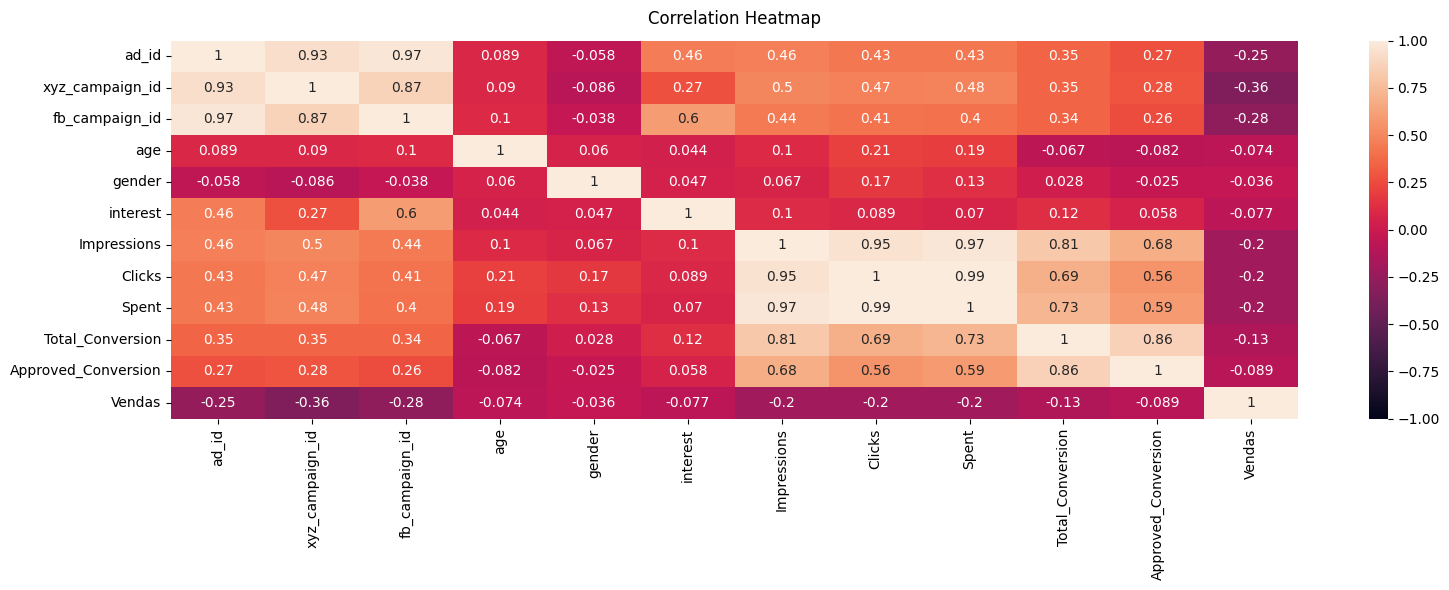

In [49]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

count    1143.000000
mean        2.855643
std         4.483593
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        60.000000
Name: Total_Conversion, dtype: float64


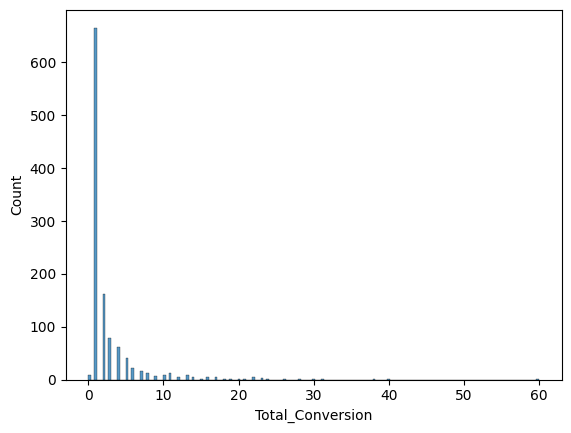

In [11]:
print(df1['Total_Conversion'].describe())
sns.histplot(data=df1, x='Total_Conversion');

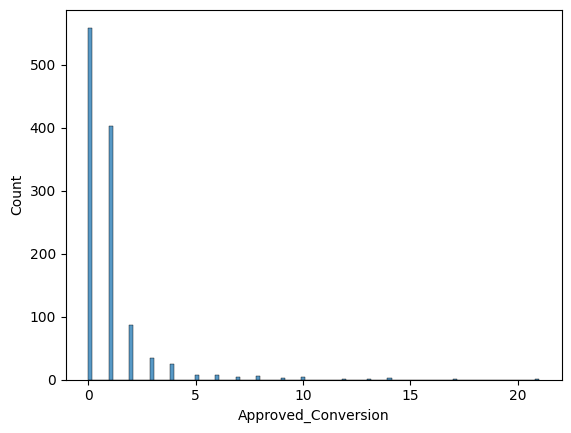

In [12]:
sns.histplot(data=df1, x='Approved_Conversion');

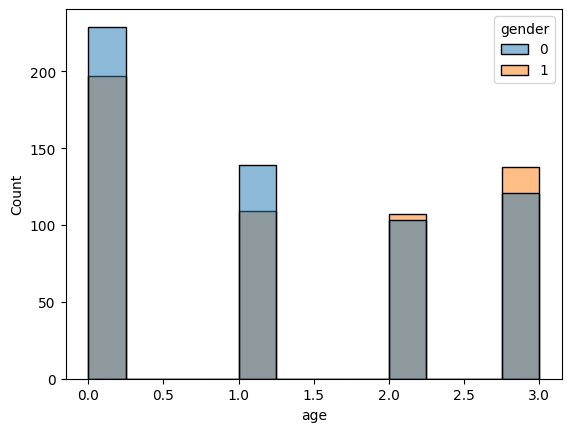

In [14]:
sns.histplot(data=df1, x='age', hue='gender');

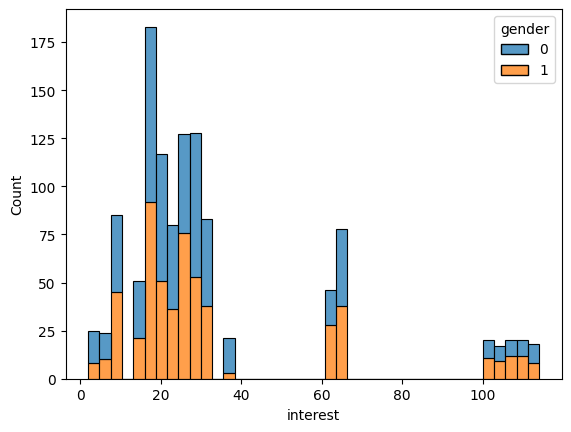

In [16]:
sns.histplot(data=df1, x='interest', hue='gender', multiple="stack");

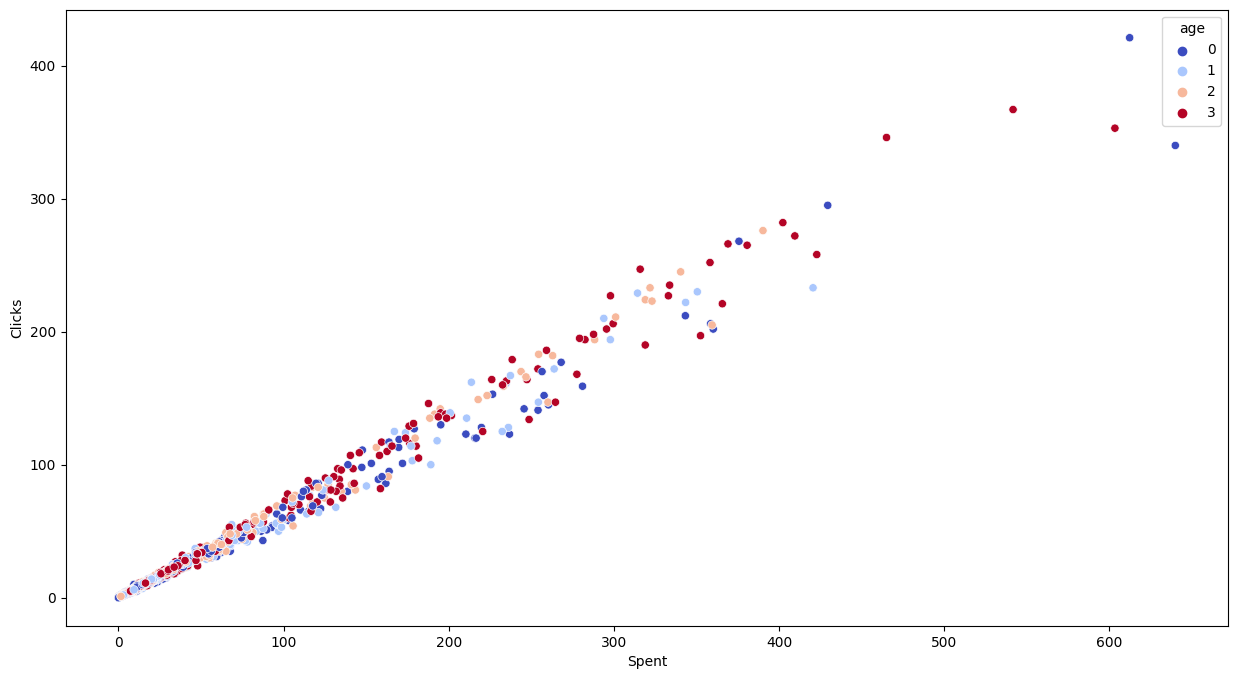

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Spent', y='Clicks', data=df1, hue='age', palette='coolwarm');

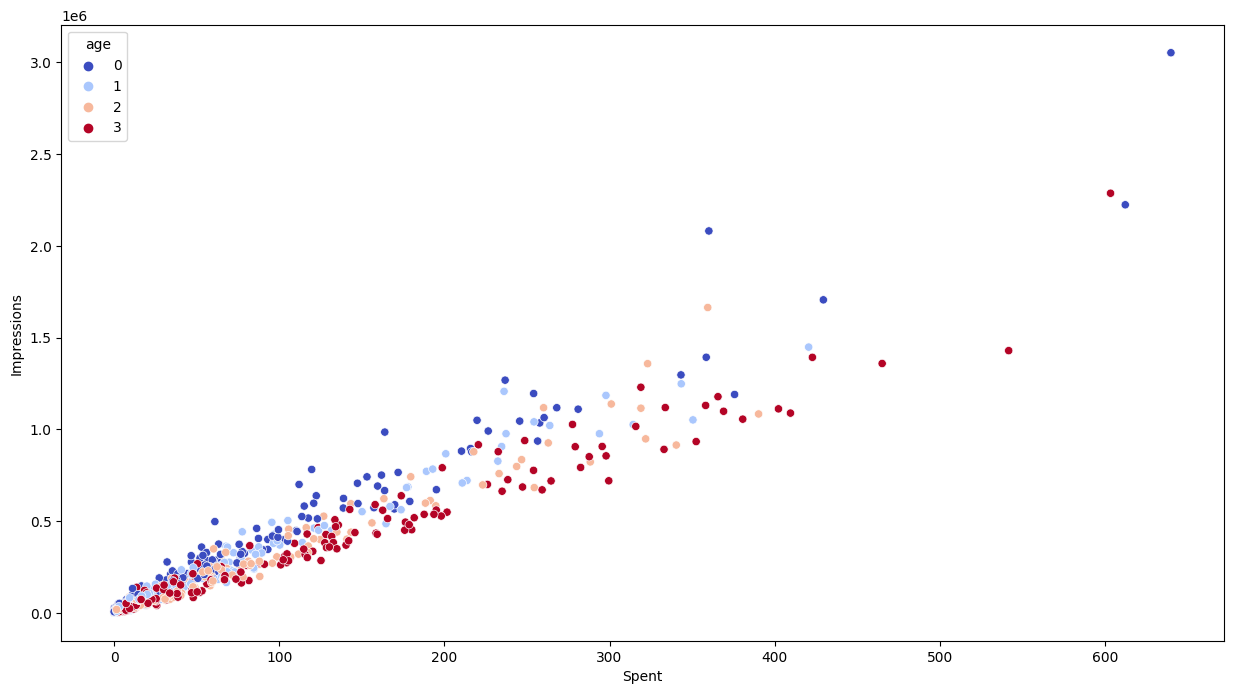

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Spent', y='Impressions', data=df1, hue='age', palette='coolwarm');

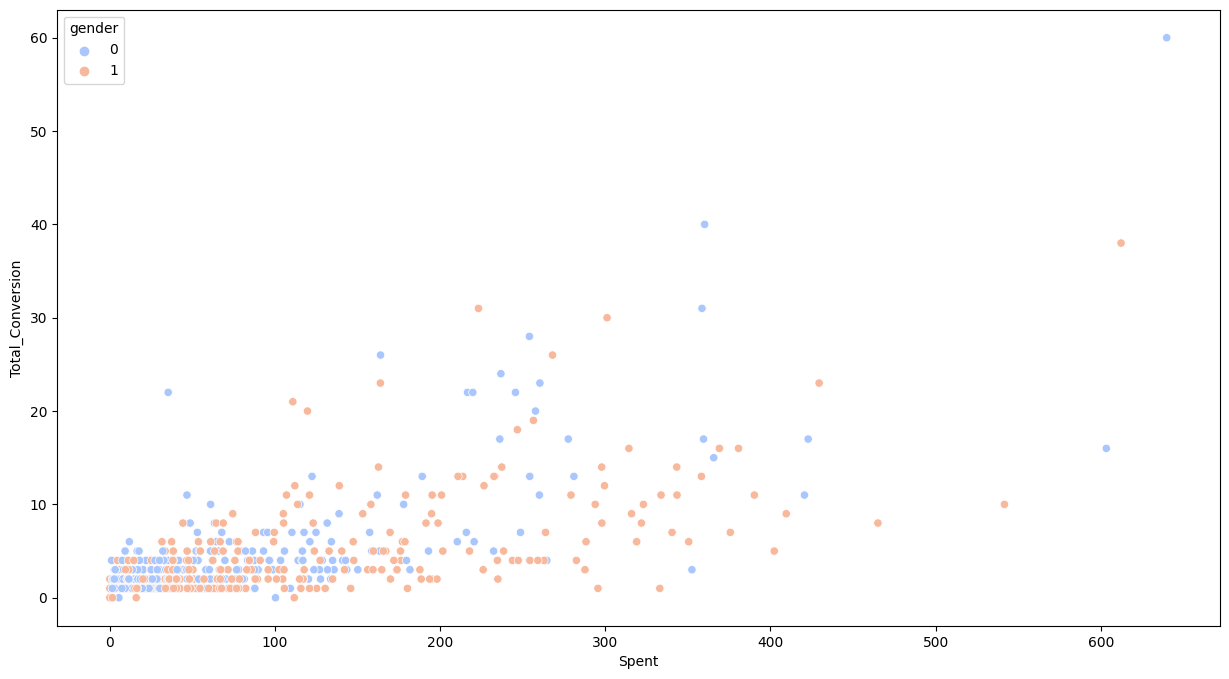

In [46]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Spent', y='Total_Conversion', data=df1, hue='gender', palette='coolwarm');

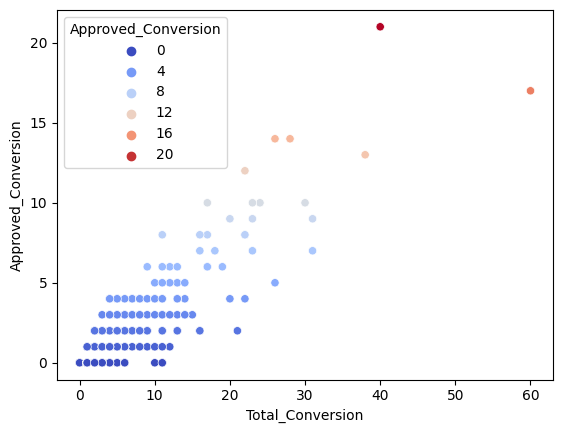

In [20]:
sns.scatterplot(x='Total_Conversion', y='Approved_Conversion', data=df1, hue='Approved_Conversion', palette='coolwarm');

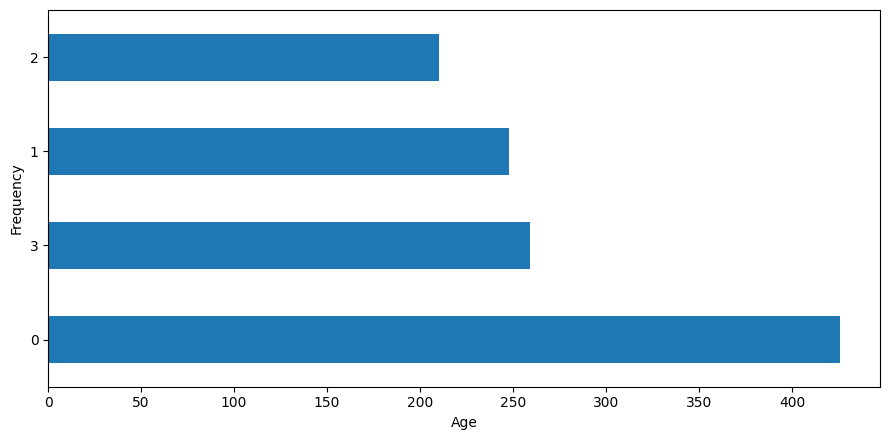

In [48]:
plt.rcParams["figure.figsize"] = [9, 4.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df2['age'].value_counts().plot(ax=ax, kind='barh', xlabel='Age', ylabel='Frequency')
plt.show()

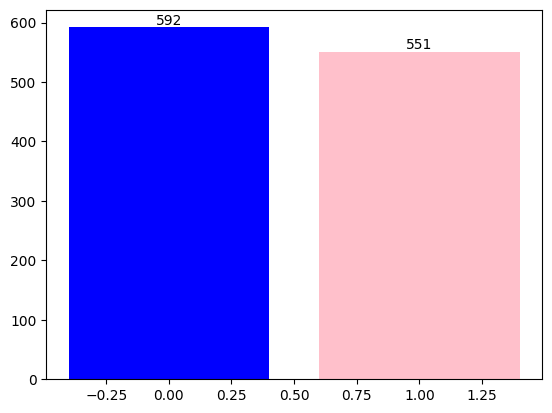

In [21]:
idade = df1['gender'].value_counts()
colors = ['blue', 'pink']

plt.bar(idade.index, idade.values, color=colors)

# Add quantity labels on top of each bar
for i, v in enumerate(idade.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

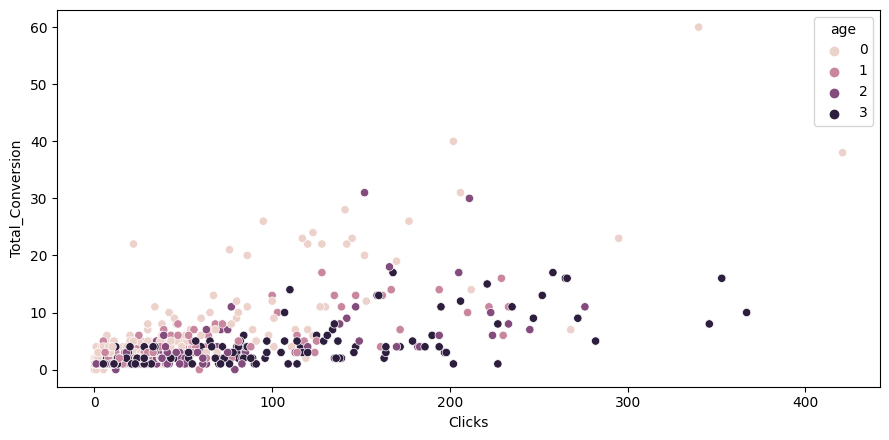

In [53]:
sns.scatterplot(x = df2['Clicks'], y = df2['Total_Conversion'], hue=df2["age"])
plt.show()

# Creatte other columns

In [44]:
df1['Vendas'] = df1['Total_Conversion'] / df1['Impressions']
df1

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Vendas
0,708746,916,103916,0,0,15,7350,1,1.430000,2,1,0.000272
1,708749,916,103917,0,0,16,17861,2,1.820000,2,0,0.000112
2,708771,916,103920,0,0,20,693,0,0.000000,1,0,0.001443
3,708815,916,103928,0,0,28,4259,1,1.250000,1,0,0.000235
4,708818,916,103928,0,0,28,4133,1,1.290000,1,1,0.000242
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,3,1,109,1129773,252,358.189997,13,2,0.000012
1139,1314411,1178,179978,3,1,110,637549,120,173.880003,3,0,0.000005
1140,1314412,1178,179979,3,1,111,151531,28,40.289999,2,0,0.000013
1141,1314414,1178,179981,3,1,113,790253,135,198.710001,8,2,0.000010


# copy

In [25]:
df2 = df1.copy()

# Machine Learning 

### Random regressor 

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [28]:
X = df1.drop('Clicks', axis=1)
y = df1['Clicks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = RandomForestRegressor()

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [32]:
actual_vs_predict = pd.DataFrame({'actual': y_test,
                                  'prediction': y_preds,
                                 'diferença': (y_test-y_preds)})

print(actual_vs_predict.sample(15))


      actual  prediction  diferença
745       32       34.25      -2.25
199       24       35.44     -11.44
864       13       11.07       1.93
971       24       21.92       2.08
390        0        0.00       0.00
761       72       75.70      -3.70
394        0        0.00       0.00
814       82       91.80      -9.80
346        1        1.00       0.00
292        0        0.00       0.00
1112       6        6.93      -0.93
605       12       12.21      -0.21
113        0        0.00       0.00
192        9        7.65       1.35
63         1        1.02      -0.02


In [31]:
# Calcula o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_preds)
print('MSE:', mse)

# Calcula o coeficiente de determinação (R^2)
r2 = r2_score(y_test, y_preds)
print('R^2:', r2)

MSE: 16.879344541484713
R^2: 0.99370730670178


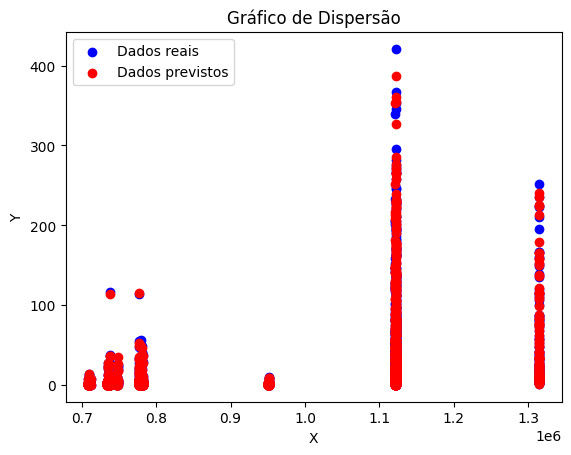

In [33]:
import matplotlib.pyplot as plt

# Dados reais
X = df1.drop('Clicks', axis=1)
y_test1 = df1['Clicks']

# Dados previstos
y_pred = model.predict(X)  # Substitua 'model' pelo nome do seu modelo treinado

# Plotar o gráfico de dispersão com cores diferentes para y_test e y_preds
plt.scatter(X['ad_id'], y_test1, c='blue', label='Dados reais')
plt.scatter(X['ad_id'], y_pred, c='red', label='Dados previstos')

# Adicionar rótulos e legendas
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersão')

# Adicionar uma legenda
plt.legend()

# Exibir o gráfico
plt.show()


### regressão linear

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg_pred = reg.predict(X_test)

In [35]:
actual_vs_predict = pd.DataFrame({'actual': y_test,
                                  'prediction': reg_pred,
                                 'Diferença': (reg_pred - y_test)})
print(actual_vs_predict.sample(15))

     actual  prediction  Diferença
58        0   -1.542677  -1.542677
306       0    1.804281   1.804281
602      14   12.684015  -1.315985
884     212  219.720222   7.720222
294       0   -0.962773  -0.962773
761      72   81.620079   9.620079
243       3    1.161823  -1.838177
404       3    1.779304  -1.220696
231       2    3.603735   1.603735
494       1    1.593317   0.593317
876      77   77.980538   0.980538
733      30   28.644007  -1.355993
139      36   41.182696   5.182696
331       1   -0.883332  -1.883332
247       2    0.020081  -1.979919


In [36]:
mse = mean_squared_error(y_test, reg_pred)
print('MSE:', mse)

# Calcula o coeficiente de determinação (R^2)
r2 = r2_score(y_test, reg_pred)
print('R^2:', r2)

MSE: 25.955486194361445
R^2: 0.990323681489771


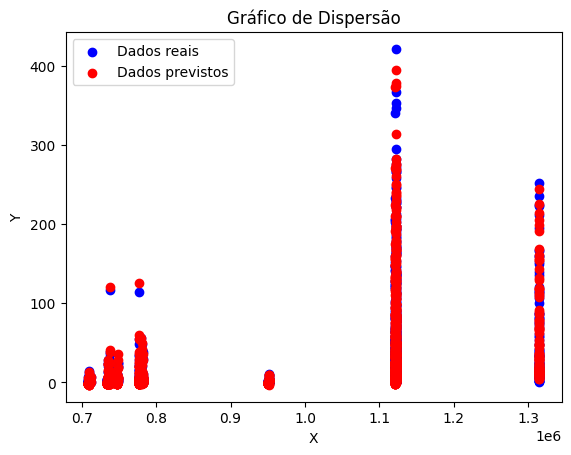

In [37]:
# Dados reais
X = df1.drop('Clicks', axis=1)
y_test2 = df1['Clicks']

# Dados previstos
reg_preds = reg.predict(X)  # Substitua 'model' pelo nome do seu modelo treinado

# Plotar o gráfico de dispersão com cores diferentes para y_test e y_preds
plt.scatter(X['ad_id'], y_test2, c='blue', label='Dados reais')
plt.scatter(X['ad_id'], reg_preds, c='red', label='Dados previstos')

# Adicionar rótulos e legendas
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersão')

# Adicionar uma legenda
plt.legend()

# Exibir o gráfico
plt.show()

# model wiht graphics 

Digite o valor investido: 100


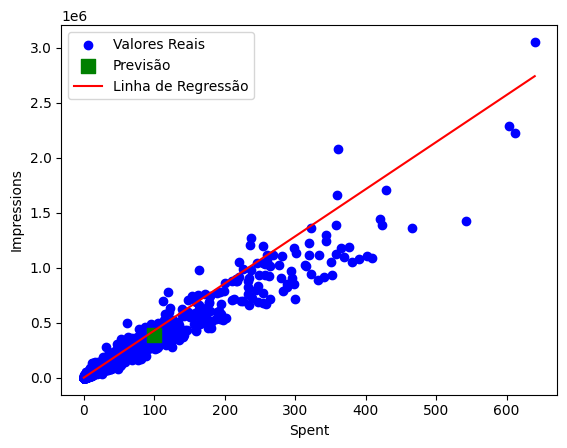

Previsão de Impressions: 394004.8


In [41]:
X = df1['Spent'].values.reshape(-1, 1)
y = df1['Impressions']

modelo = RandomForestRegressor()
modelo.fit(X, y)

# Valor de investimento para a previsão
spent = float(input("Digite o valor investido: "))

# Criando um novo conjunto de dados com 1 recurso
dados_previsao = np.array([[spent]])

# Fazendo a previsão de Approved_Conversion
previsao = modelo.predict(dados_previsao)

# Plotando o gráfico de dispersão com linha de regressão
plt.scatter(X, y, color='b', label='Valores Reais')
plt.scatter(spent, previsao, color='g', marker='s', s=100, label='Previsão')
plt.plot([X.min(), X.max()], [modelo.predict([[X.min()]]), modelo.predict([[X.max()]])], color='r', label='Linha de Regressão')
plt.xlabel('Spent')
plt.ylabel('Impressions')
plt.legend()
plt.show()

print("Previsão de Impressions:", previsao[0])

Digite o valor investido: 600


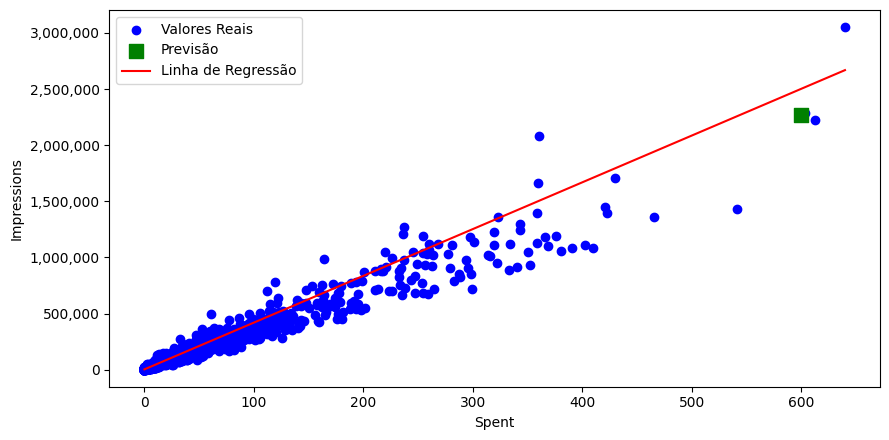

Previsão de Impressions: 2271198.38


In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.ticker as mtick

X = df1['Spent'].values.reshape(-1, 1)
y = df1['Impressions']

modelo = RandomForestRegressor()
modelo.fit(X, y)

# Valor de investimento para a previsão
spent = float(input("Digite o valor investido: "))

# Criando um novo conjunto de dados com 1 recurso
dados_previsao = np.array([[spent]])

# Fazendo a previsão de Impressions
previsao = modelo.predict(dados_previsao)

# Plotando o gráfico de dispersão com linha de regressão
plt.scatter(X, y, color='b', label='Valores Reais')
plt.scatter(spent, previsao, color='g', marker='s', s=100, label='Previsão')
plt.plot([X.min(), X.max()], [modelo.predict([[X.min()]]), modelo.predict([[X.max()]])], color='r', label='Linha de Regressão')
plt.xlabel('Spent')
plt.ylabel('Impressions')

# Set the formatter for the y-axis to display values in thousands
formatter = mtick.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()
plt.show()

print("Previsão de Impressions:", previsao[0])


Digite o valor investido: 500


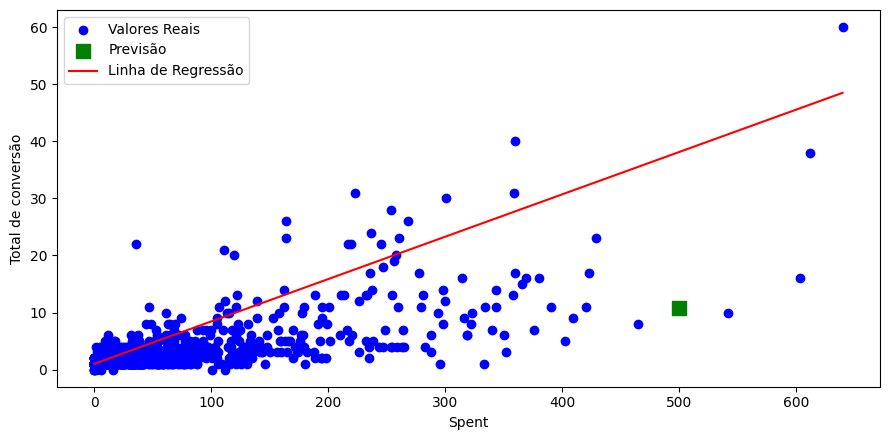

Previsão de Total de conversão: 10.75


In [62]:
X = df1['Spent'].values.reshape(-1, 1)
y = df1['Total_Conversion']

modelo = RandomForestRegressor()
modelo.fit(X, y)

# Valor de investimento para a previsão
spent = float(input("Digite o valor investido: "))

# Criando um novo conjunto de dados com 1 recurso
dados_previsao = np.array([[spent]])

# Fazendo a previsão de Approved_Conversion
previsao = modelo.predict(dados_previsao)

# Plotando o gráfico de dispersão com linha de regressão
plt.scatter(X, y, color='b', label='Valores Reais')
plt.scatter(spent, previsao, color='g', marker='s', s=100, label='Previsão')
plt.plot([X.min(), X.max()], [modelo.predict([[X.min()]]), modelo.predict([[X.max()]])], color='r', label='Linha de Regressão')
plt.xlabel('Spent')
plt.ylabel('Total de conversão')
plt.legend()
plt.show()

print("Previsão de Total de conversão:", previsao[0])



### exemplo

Podemos dizer que investimos 500,00 em propagandas/campanha para o "nosso" produto rodar a internet para os interessados. E com essa predição de quantos irá converter a campanha para o objetivo final. Exemplo: o nosso produto custa 100,00 e como o modelo diz que aproximandente 10 pessoas converteram em vendas, então teremos o ganho de 1000,00 e o lucro de 500,00   

Digite o valor investido: 750


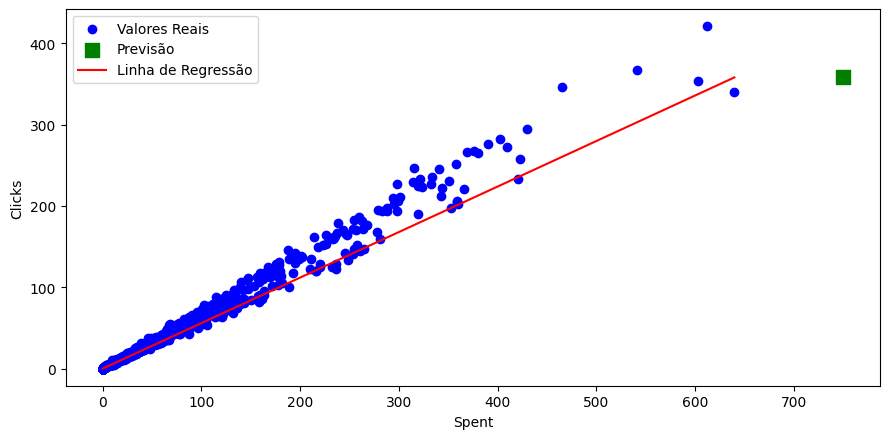

Previsão de Clicks: 357.95


In [71]:
X = df1['Spent'].values.reshape(-1, 1)
y = df1['Clicks']

modelo = RandomForestRegressor()
modelo.fit(X, y)

# Valor de investimento para a previsão
spent = float(input("Digite o valor investido: "))

# Criando um novo conjunto de dados com 1 recurso
dados_previsao = np.array([[spent]])

# Fazendo a previsão de Approved_Conversion
previsao = modelo.predict(dados_previsao)

# Plotando o gráfico de dispersão com linha de regressão
plt.scatter(X, y, color='b', label='Valores Reais')
plt.scatter(spent, previsao, color='g', marker='s', s=100, label='Previsão')
plt.plot([X.min(), X.max()], [modelo.predict([[X.min()]]), modelo.predict([[X.max()]])], color='r', label='Linha de Regressão')
plt.xlabel('Spent')
plt.ylabel('Clicks')
plt.legend()
plt.show()

print("Previsão de Clicks:", previsao[0])

### Model Linear Regression with graphic 

Digite o valor investido: 750


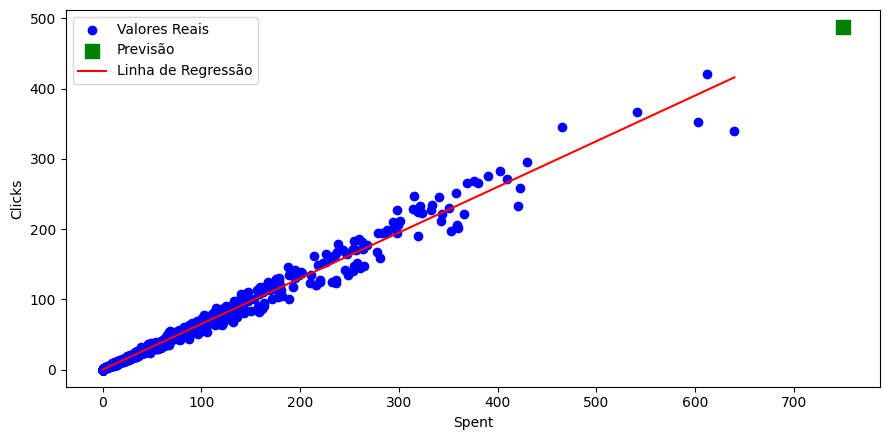

Previsão de Clicks: 487.49283918191526


In [64]:
import matplotlib.pyplot as plt


X = df1['Spent'].values.reshape(-1, 1)
y = df1['Clicks']

reg = LinearRegression().fit(X, y)
reg.fit(X, y)

# Valor de investimento para a previsão
spent = float(input("Digite o valor investido: "))

# Criando um novo conjunto de dados com 1 recurso
dados_previsao = np.array([[spent]])

# Fazendo a previsão de Approved_Conversion
previsao = reg.predict(dados_previsao)

# Plotando o gráfico de dispersão com linha de regressão
plt.scatter(X, y, color='b', label='Valores Reais')
plt.scatter(spent, previsao, color='g', marker='s', s=100, label='Previsão')
plt.plot([X.min(), X.max()], [reg.predict([[X.min()]]), reg.predict([[X.max()]])], color='r', label='Linha de Regressão')
plt.xlabel('Spent')
plt.ylabel('Clicks')
plt.legend()
plt.show()

print("Previsão de Clicks:", previsao[0])